# TAMILNADU

In [555]:
import pandas as pd

# Load the datasets for Tamil Nadu with corrected filenames
df_tn_enrolment = pd.read_csv('/content/TamilNadu Enrolment Dataset.csv')
df_tn_demographic = pd.read_csv('/content/TamilNadu Demographic Dataset.csv')
df_tn_biometric = pd.read_csv('/content/TamilNadu Biometric Dataset.csv')

print("Tamil Nadu Enrolment Dataset:")
print(df_tn_enrolment.head())
print(df_tn_enrolment.info())
print(df_tn_enrolment.describe())

print("\nTamil Nadu Demographic Dataset:")
print(df_tn_demographic.head())
print(df_tn_demographic.info())
print(df_tn_demographic.describe())

# Standardize the 'state' column in df_tn_biometric
df_tn_biometric['state'] = df_tn_biometric['state'].str.title()

print("\nTamil Nadu Biometric Dataset:")
print(df_tn_biometric.head())
print(df_tn_biometric.info())
print(df_tn_biometric.describe())

Tamil Nadu Enrolment Dataset:
         date       state      district  pincode  age_0_5  age_5_17  \
0  01-05-2025  Tamil Nadu   Pudukkottai   614616      143        34   
1  01-06-2025  Tamil Nadu   Kanchipuram   631502      264        76   
2  01-06-2025  Tamil Nadu         Salem   636006       90        21   
3  01-06-2025  Tamil Nadu       Vellore   635810      154        65   
4  01-06-2025  Tamil Nadu  Kallakurichi   605801       53        12   

   age_18_greater  
0              13  
1              11  
2              11  
3              16  
4              10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111325 entries, 0 to 111324
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            111325 non-null  object
 1   state           111325 non-null  object
 2   district        111325 non-null  object
 3   pincode         111325 non-null  int64 
 4   age_0_5         111325 non-null  int64

In [556]:
df_tn_enrolment['date'] = pd.to_datetime(df_tn_enrolment['date'], format='%d-%m-%Y')
df_tn_demographic['date'] = pd.to_datetime(df_tn_demographic['date'], format='%d-%m-%Y')
df_tn_biometric['date'] = pd.to_datetime(df_tn_biometric['date'], format='%d-%m-%Y')

merged_tn_df_temp = pd.merge(df_tn_enrolment, df_tn_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_tn_merged = pd.merge(merged_tn_df_temp, df_tn_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_tn_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_tn_merged[numeric_cols] = df_tn_merged[numeric_cols].fillna(0)

print("Data types after date conversion for df_tn_enrolment:")
print(df_tn_enrolment.info())
print("\nData types after date conversion for df_tn_demographic:")
print(df_tn_demographic.info())
print("\nData types after date conversion for df_tn_biometric:")
print(df_tn_biometric.info())

print("\nMerged Tamil Nadu DataFrame (df_tn_merged) head:")
print(df_tn_merged.head())
print("\nMerged Tamil Nadu DataFrame (df_tn_merged) info:")
print(df_tn_merged.info())
print("\nMerged Tamil Nadu DataFrame (df_tn_merged) describe:")
print(df_tn_merged.describe())

Data types after date conversion for df_tn_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111325 entries, 0 to 111324
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            111325 non-null  datetime64[ns]
 1   state           111325 non-null  object        
 2   district        111325 non-null  object        
 3   pincode         111325 non-null  int64         
 4   age_0_5         111325 non-null  int64         
 5   age_5_17        111325 non-null  int64         
 6   age_18_greater  111325 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.9+ MB
None

Data types after date conversion for df_tn_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232752 entries, 0 to 232751
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date     

In [557]:
df_tn = df_tn_merged[df_tn_merged['state'] == 'Tamil Nadu'].copy()
df_tn['year'] = df_tn['date'].dt.year
df_tn['month'] = df_tn['date'].dt.month

print("Shape of df_tn:", df_tn.shape)
print("\nFirst 5 rows of df_tn with new 'year' and 'month' columns:")
print(df_tn.head())

Shape of df_tn: (558533, 13)

First 5 rows of df_tn with new 'year' and 'month' columns:
        date       state  district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Tamil Nadu  Ariyalur   608901      0.0       0.0   
1 2025-03-01  Tamil Nadu  Ariyalur   612901      0.0       0.0   
2 2025-03-01  Tamil Nadu  Ariyalur   612902      0.0       0.0   
3 2025-03-01  Tamil Nadu  Ariyalur   612903      0.0       0.0   
4 2025-03-01  Tamil Nadu  Ariyalur   612904      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           27.0         305.0         177.0        251.0   
1             0.0            0.0           0.0         170.0        101.0   
2             0.0            0.0           0.0         128.0         72.0   
3             0.0           17.0         424.0         162.0        142.0   
4             0.0            0.0           0.0         157.0        124.0   

   year  month  
0  2025      3  
1  2025      3  


In [558]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_tn_agg = df_tn.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_tn_agg) head:")
print(df_tn_agg.head())
print("\nAggregated DataFrame (df_tn_agg) info:")
print(df_tn_agg.info())

Aggregated DataFrame (df_tn_agg) head:
   year  month       state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tamil Nadu      Ariyalur      0.0       0.0             0.0   
1  2025      3  Tamil Nadu  Chengalpattu      0.0       0.0             0.0   
2  2025      3  Tamil Nadu       Chennai      0.0       0.0             0.0   
3  2025      3  Tamil Nadu    Coimbatore      0.0       0.0             0.0   
4  2025      3  Tamil Nadu     Cuddalore      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          509.0        6365.0        5352.0       7052.0  
1          136.0        1181.0         273.0        213.0  
2         1974.0       23550.0        8351.0      12280.0  
3         1313.0       16609.0        9114.0      16104.0  
4          780.0       14390.0        9055.0       5211.0  

Aggregated DataFrame (df_tn_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (

In [559]:
import numpy as np

# 1. Create 'totalenrolments' column
df_tn_agg['totalenrolments'] = df_tn_agg['age_0_5'] + df_tn_agg['age_5_17'] + df_tn_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_tn_agg['childenrolments'] = df_tn_agg['age_0_5'] + df_tn_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_tn_agg['totaldemoupdates'] = df_tn_agg['demo_age_5_17'] + df_tn_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_tn_agg['totalbioupdates'] = df_tn_agg['bio_age_5_17'] + df_tn_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_tn_agg['CES'] = np.where(
    df_tn_agg['totalenrolments'] == 0,
    0,
    df_tn_agg['childenrolments'] / df_tn_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_tn_agg['DUR'] = np.where(
    df_tn_agg['totalenrolments'] == 0,
    0,
    df_tn_agg['totaldemoupdates'] / df_tn_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_tn_agg['BUR'] = np.where(
    df_tn_agg['totalenrolments'] == 0,
    0,
    df_tn_agg['totalbioupdates'] / df_tn_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_tn_agg) with new metrics head:")
print(df_tn_agg.head())

Aggregated DataFrame (df_tn_agg) with new metrics head:
   year  month       state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tamil Nadu      Ariyalur      0.0       0.0             0.0   
1  2025      3  Tamil Nadu  Chengalpattu      0.0       0.0             0.0   
2  2025      3  Tamil Nadu       Chennai      0.0       0.0             0.0   
3  2025      3  Tamil Nadu    Coimbatore      0.0       0.0             0.0   
4  2025      3  Tamil Nadu     Cuddalore      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          509.0        6365.0        5352.0       7052.0              0.0   
1          136.0        1181.0         273.0        213.0              0.0   
2         1974.0       23550.0        8351.0      12280.0              0.0   
3         1313.0       16609.0        9114.0      16104.0              0.0   
4          780.0       14390.0        9055.0       5211.0              0.0   



In [560]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_tn_agg['Enorm'] = df_tn_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_tn_agg['Dnorm'] = df_tn_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_tn_agg['Bnorm'] = df_tn_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_tn_agg['stdnorm'] = (df_tn_agg['Enorm'] + df_tn_agg['Dnorm'] + df_tn_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_tn_agg['ALBI'] = 1 - df_tn_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_tn_agg['ALBI'] = df_tn_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_tn_agg) with normalized metrics and ALBI head:")
print(df_tn_agg.head())

Aggregated DataFrame (df_tn_agg) with normalized metrics and ALBI head:
   year  month       state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tamil Nadu      Ariyalur      0.0       0.0             0.0   
1  2025      3  Tamil Nadu  Chengalpattu      0.0       0.0             0.0   
2  2025      3  Tamil Nadu       Chennai      0.0       0.0             0.0   
3  2025      3  Tamil Nadu    Coimbatore      0.0       0.0             0.0   
4  2025      3  Tamil Nadu     Cuddalore      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          509.0        6365.0        5352.0  ...            6874.0   
1          136.0        1181.0         273.0  ...            1317.0   
2         1974.0       23550.0        8351.0  ...           25524.0   
3         1313.0       16609.0        9114.0  ...           17922.0   
4          780.0       14390.0        9055.0  ...           15170.0   

   totalbioupdates  CES  D

In [561]:
df_tn_agg['Enormrisk'] = 1 - df_tn_agg['Enorm']
df_tn_agg['CESrisknorm'] = 1 - df_tn_agg['CES']
df_tn_agg['DURrisknorm'] = 1 - df_tn_agg['DUR']
df_tn_agg['BURrisknorm'] = 1 - df_tn_agg['BUR']
df_tn_agg['ALBIrisknorm'] = 1 - df_tn_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_tn_agg['riskscore'] = (
    df_tn_agg['Enormrisk'] +
    df_tn_agg['CESrisknorm'] +
    df_tn_agg['DURrisknorm'] +
    df_tn_agg['BURrisknorm'] +
    df_tn_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_tn_agg) with risk components and riskscore head:")
print(df_tn_agg.head())

Aggregated DataFrame (df_tn_agg) with risk components and riskscore head:
   year  month       state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tamil Nadu      Ariyalur      0.0       0.0             0.0   
1  2025      3  Tamil Nadu  Chengalpattu      0.0       0.0             0.0   
2  2025      3  Tamil Nadu       Chennai      0.0       0.0             0.0   
3  2025      3  Tamil Nadu    Coimbatore      0.0       0.0             0.0   
4  2025      3  Tamil Nadu     Cuddalore      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          509.0        6365.0        5352.0  ...  0.125388  0.243967   
1          136.0        1181.0         273.0  ...  0.024023  0.009559   
2         1974.0       23550.0        8351.0  ...  0.465580  0.405779   
3         1313.0       16609.0        9114.0  ...  0.326913  0.495997   
4          780.0       14390.0        9055.0  ...  0.276714  0.280589   

    stdnorm 

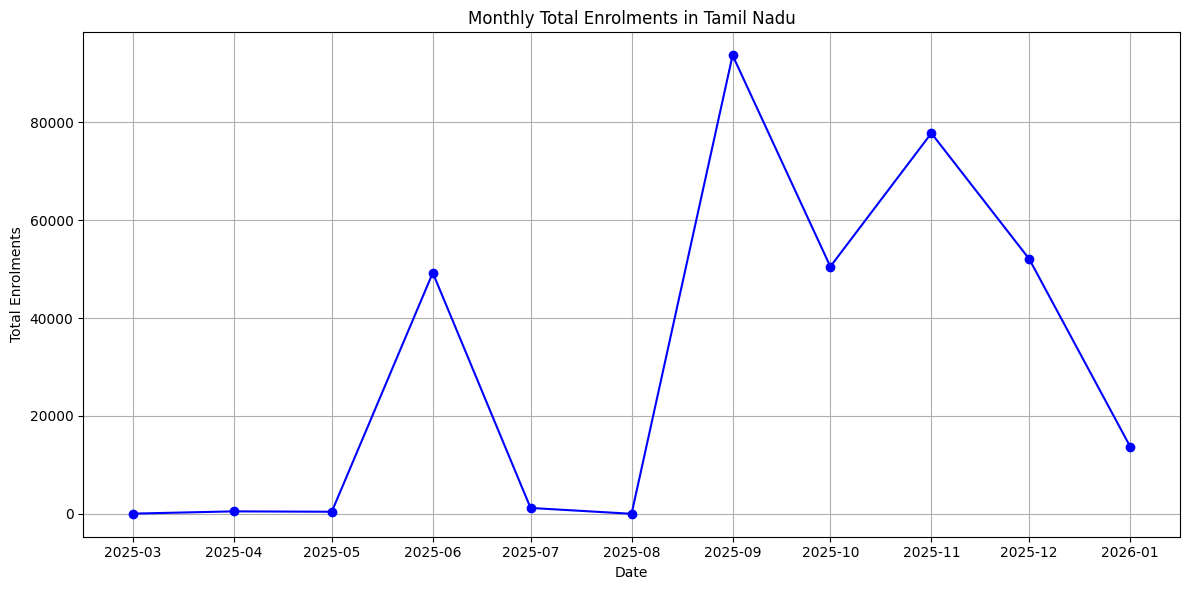

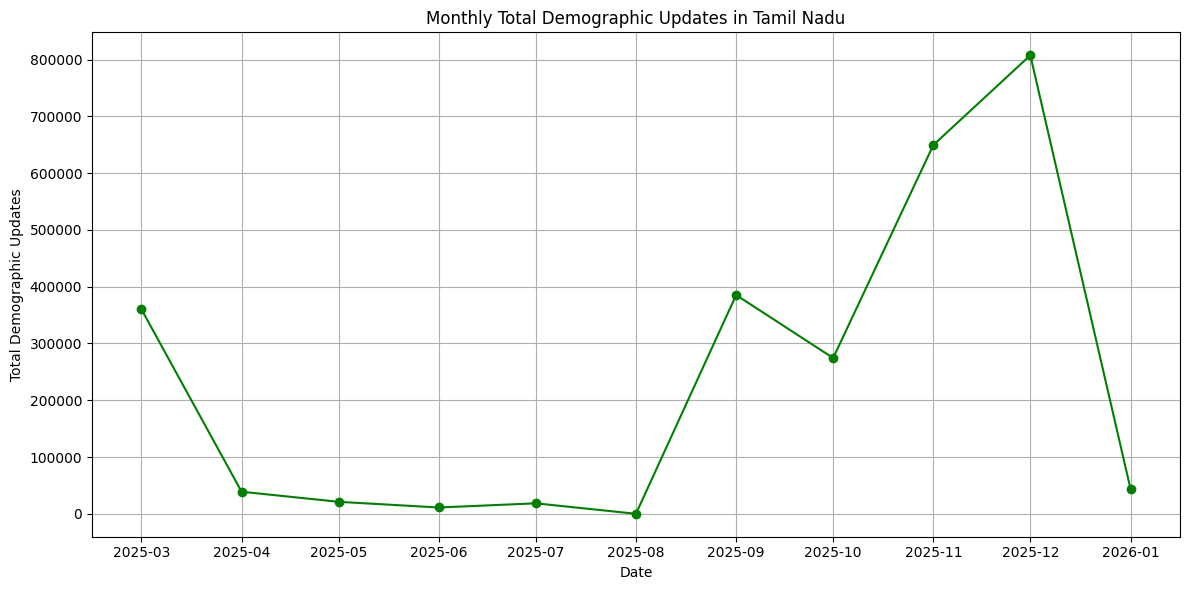

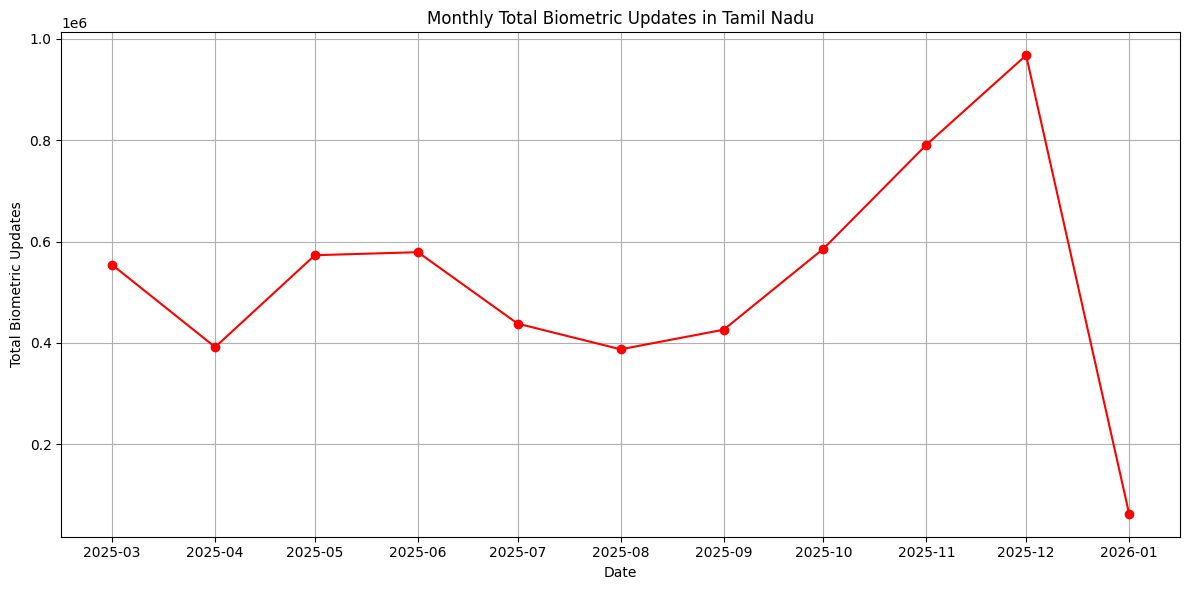

Monthly trend plots generated successfully.


In [562]:
import matplotlib.pyplot as plt
import seaborn as sns

df_tn_monthly_trends = df_tn_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_tn_monthly_trends['date'] = pd.to_datetime(df_tn_monthly_trends['year'].astype(str) + '-' + df_tn_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_tn_monthly_trends = df_tn_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tn_monthly_trends['date'], df_tn_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Tamil Nadu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tn_monthly_trends['date'], df_tn_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Tamil Nadu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tn_monthly_trends['date'], df_tn_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Tamil Nadu')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univarite Analysis**

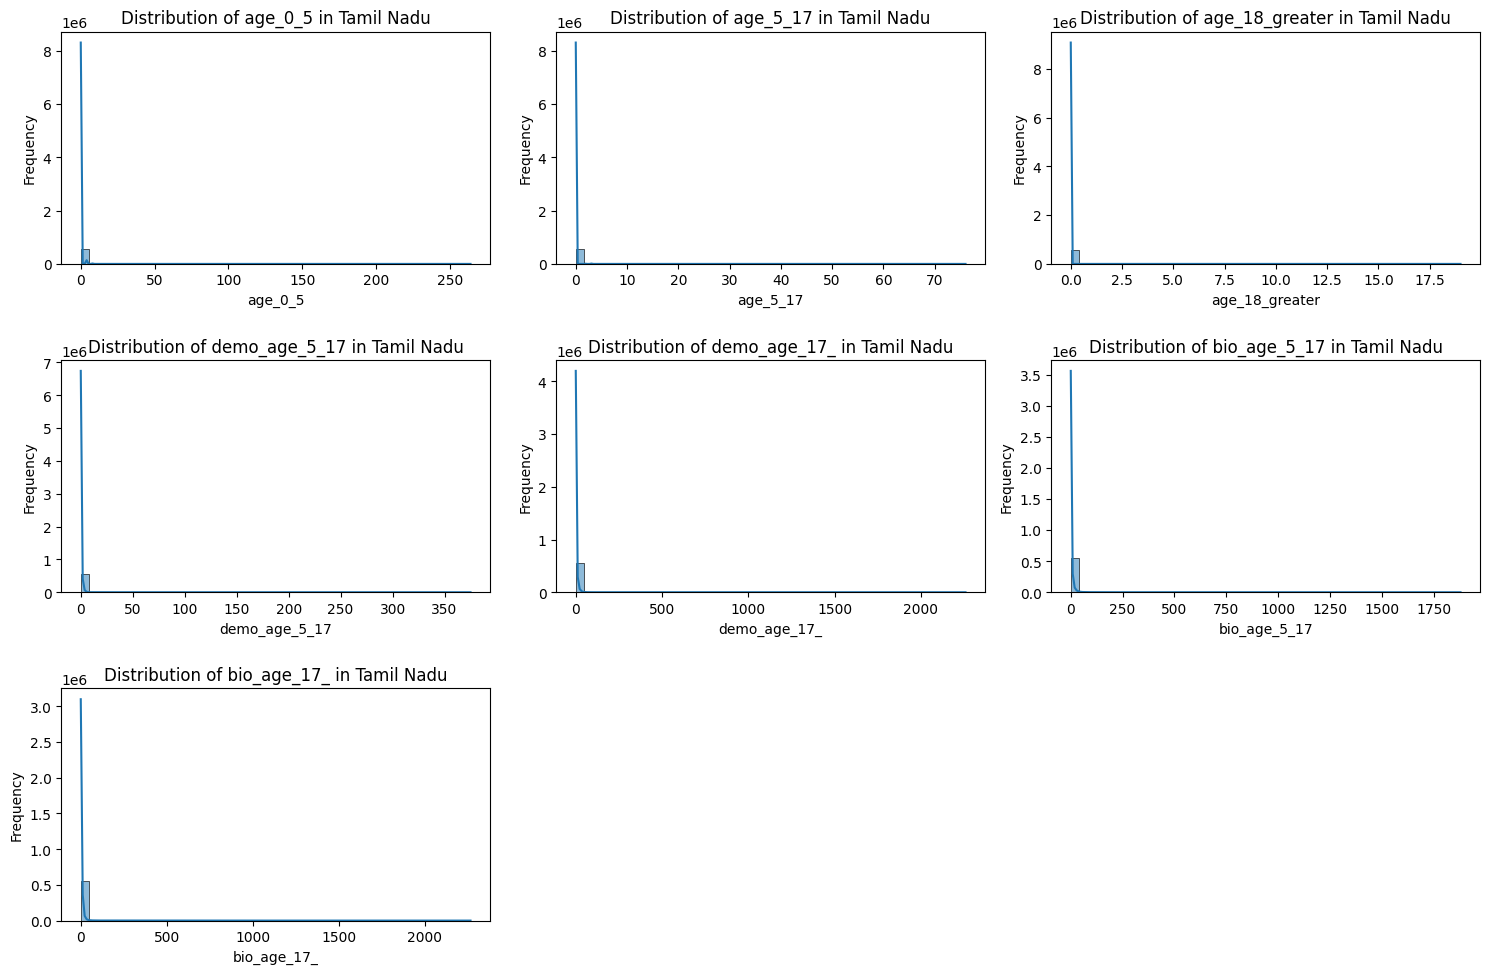

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_tn_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Tamil Nadu')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

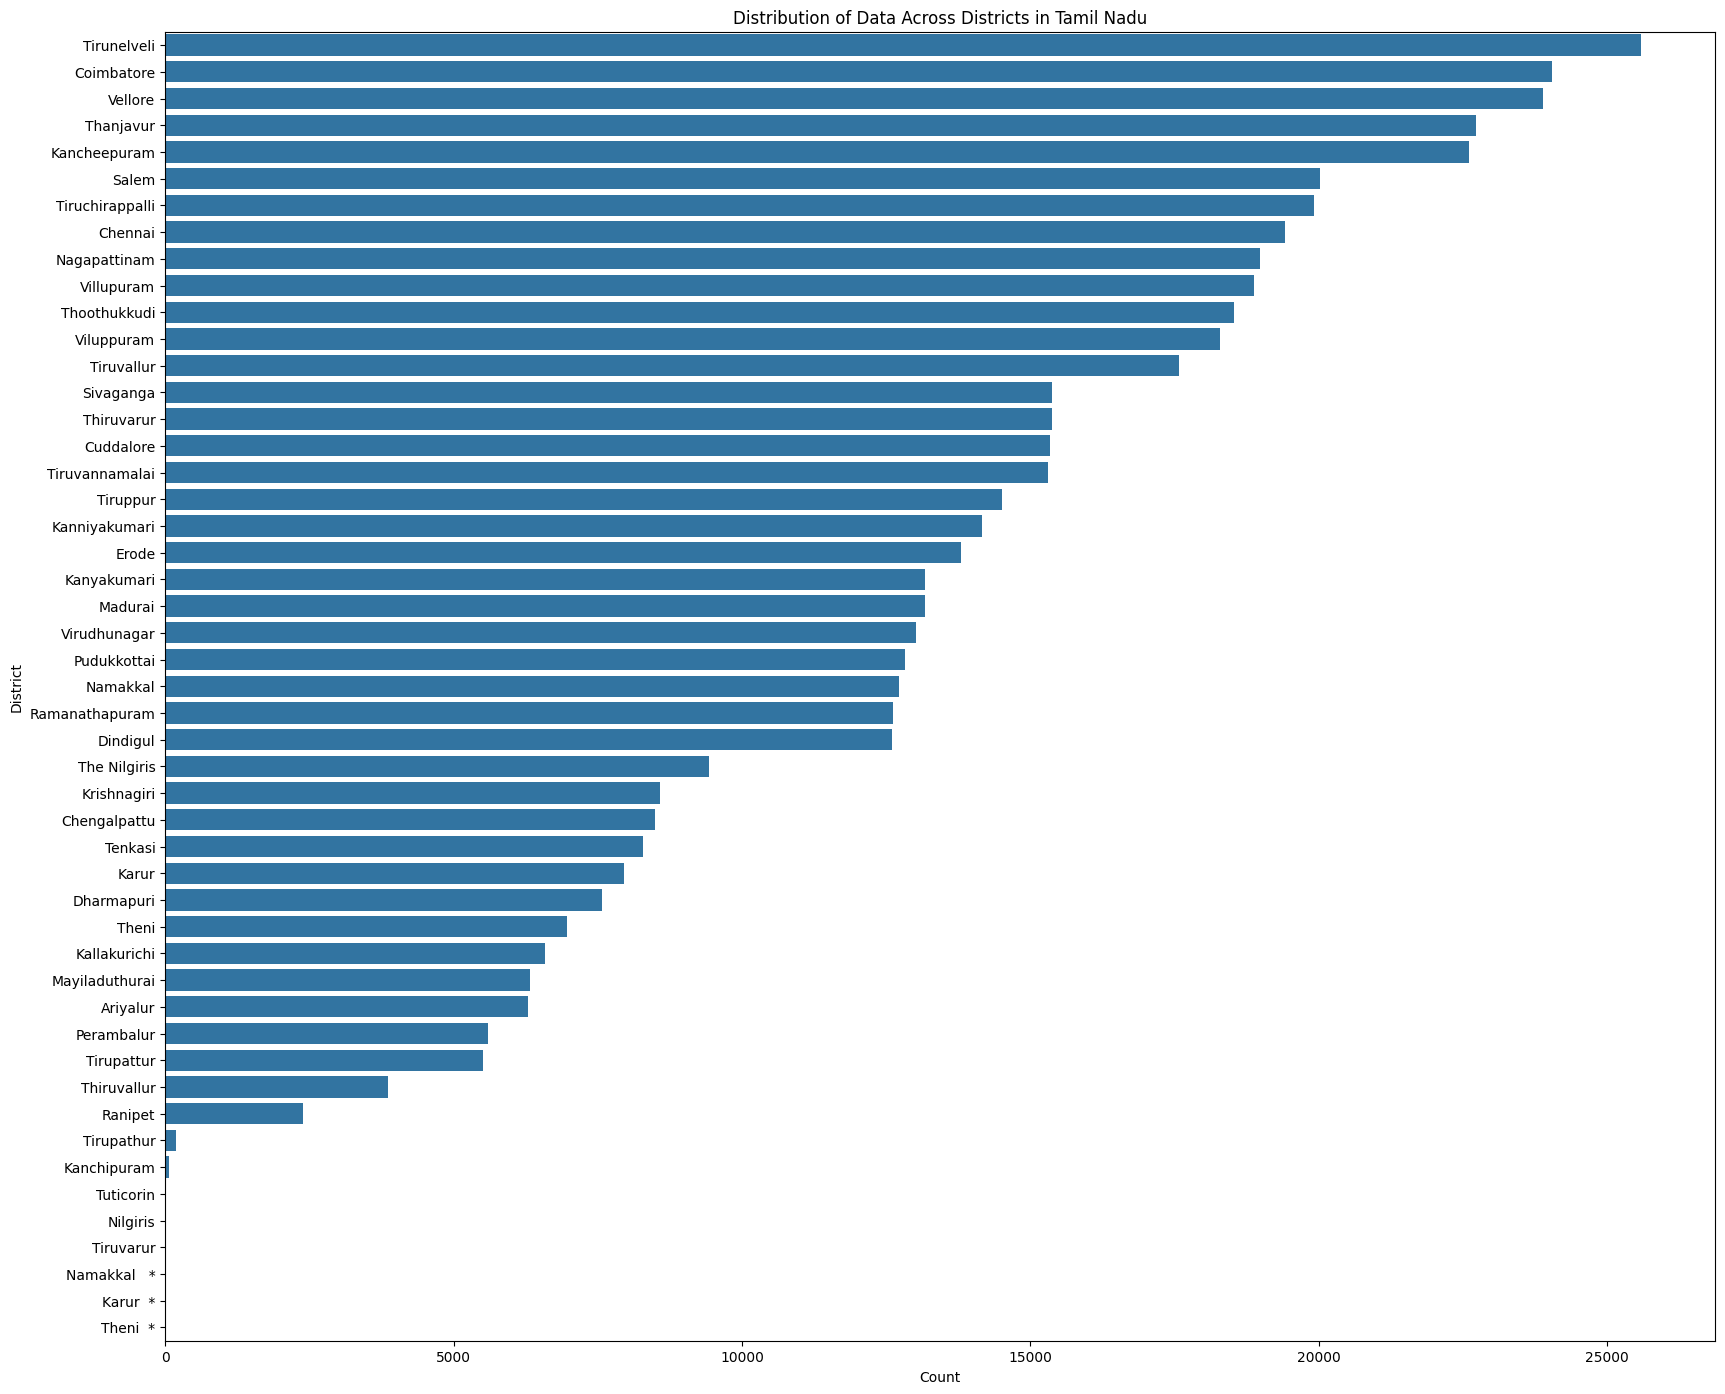

Histograms for numerical age-related columns and count plot for 'district' displayed for Tamil Nadu.


In [564]:
plt.figure(figsize=(20, 17))
sns.countplot(data=df_tn_merged, y='district', order=df_tn_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Tamil Nadu')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Tamil Nadu.")

**Bivariate and Trivarite Analysis**

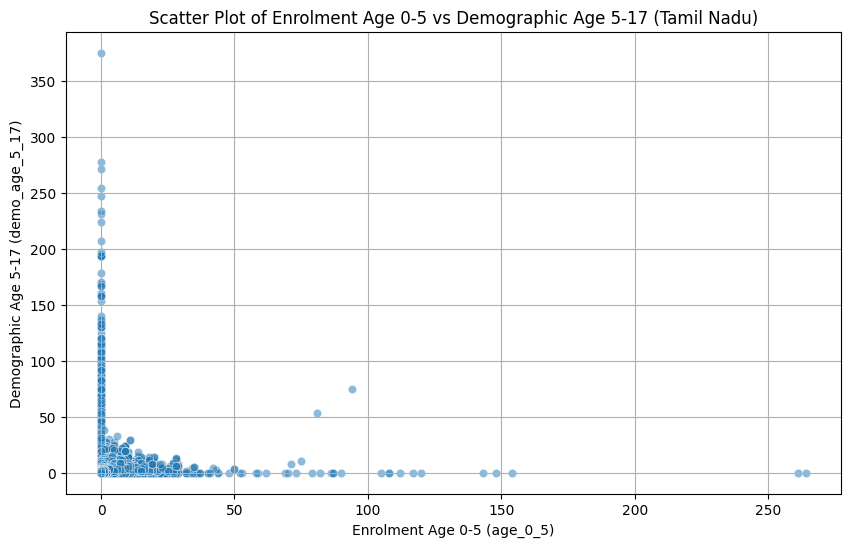

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Tamil Nadu.


In [565]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tn_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Tamil Nadu)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Tamil Nadu.")

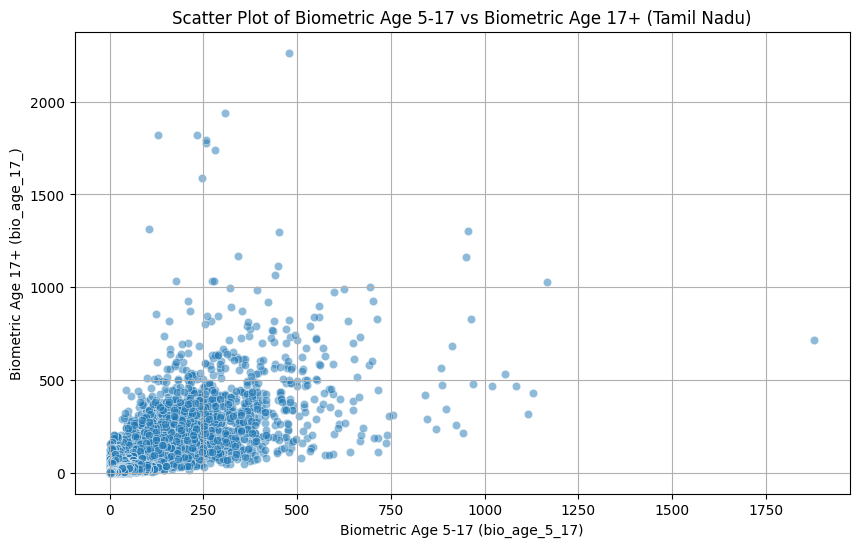

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Tamil Nadu.


In [566]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tn_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Tamil Nadu)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Tamil Nadu.")

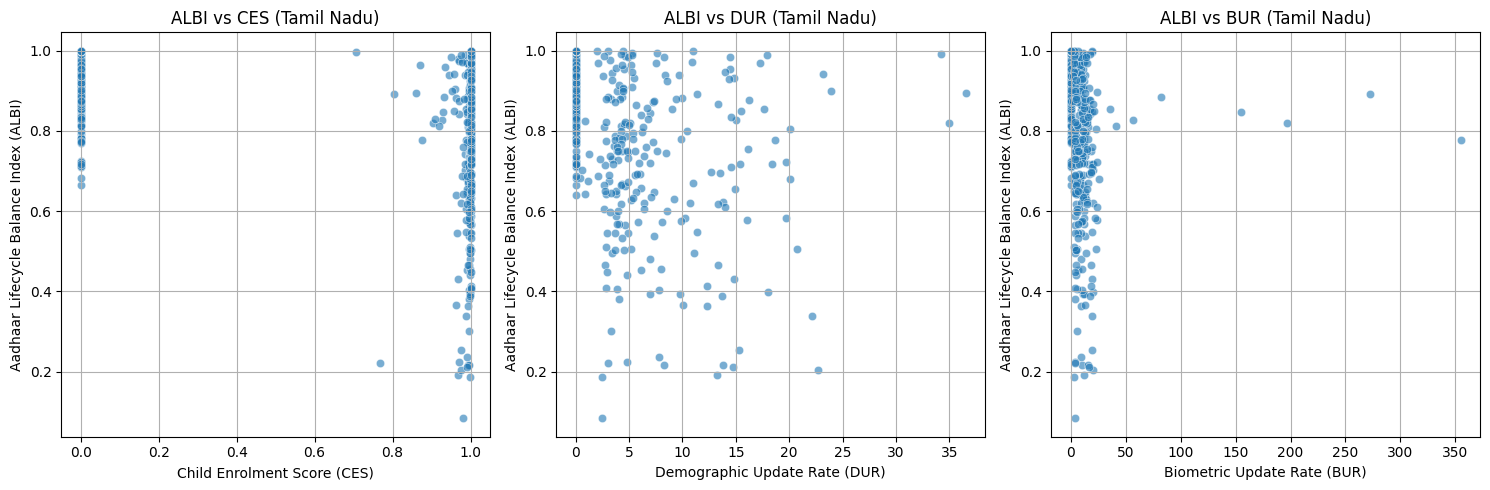

In [576]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Scatter plot for ALBI vs CES
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_tn_agg, x='CES', y='ALBI', alpha=0.6)
plt.title('ALBI vs CES (Tamil Nadu)')
plt.xlabel('Child Enrolment Score (CES)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

# Scatter plot for ALBI vs DUR
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_tn_agg, x='DUR', y='ALBI', alpha=0.6)
plt.title('ALBI vs DUR (Tamil Nadu)')
plt.xlabel('Demographic Update Rate (DUR)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

# Scatter plot for ALBI vs BUR
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_tn_agg, x='BUR', y='ALBI', alpha=0.6)
plt.title('ALBI vs BUR (Tamil Nadu)')
plt.xlabel('Biometric Update Rate (BUR)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

plt.tight_layout()
plt.show()

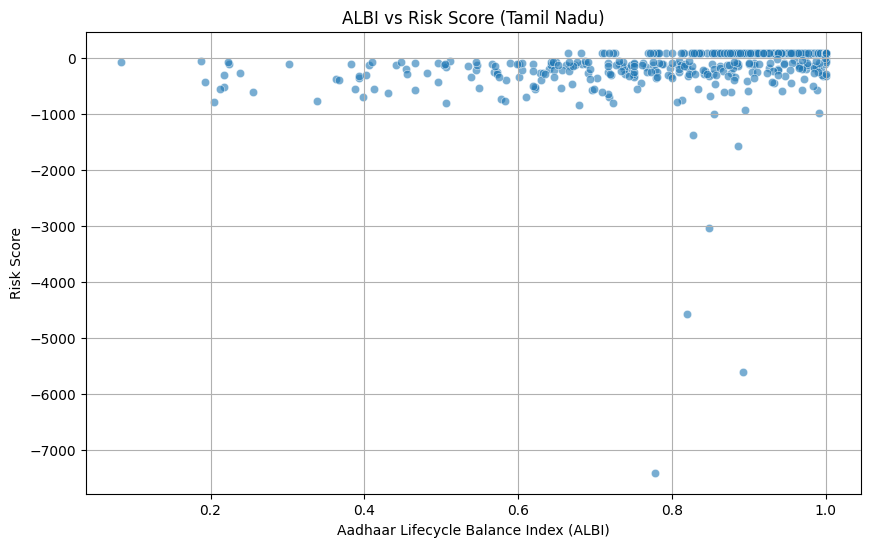

In [577]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tn_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Risk Score (Tamil Nadu)')
plt.xlabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.ylabel('Risk Score')
plt.grid(True)
plt.show()

Correlation Matrix for Tamil Nadu:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.528878        0.335563       0.108234   
age_5_17        0.528878  1.000000        0.322903       0.064883   
age_18_greater  0.335563  0.322903        1.000000       0.020685   
demo_age_5_17   0.108234  0.064883        0.020685       1.000000   
demo_age_17_    0.075894  0.041707        0.017870       0.838446   
bio_age_5_17    0.035519  0.025151        0.022388       0.362091   
bio_age_17_     0.031000  0.025094        0.025966       0.283236   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.075894      0.035519     0.031000  
age_5_17            0.041707      0.025151     0.025094  
age_18_greater      0.017870      0.022388     0.025966  
demo_age_5_17       0.838446      0.362091     0.283236  
demo_age_17_        1.000000      0.436471     0.364875  
bio_age_5_17        0.436471      1.000000     0.752603  
bio_ag

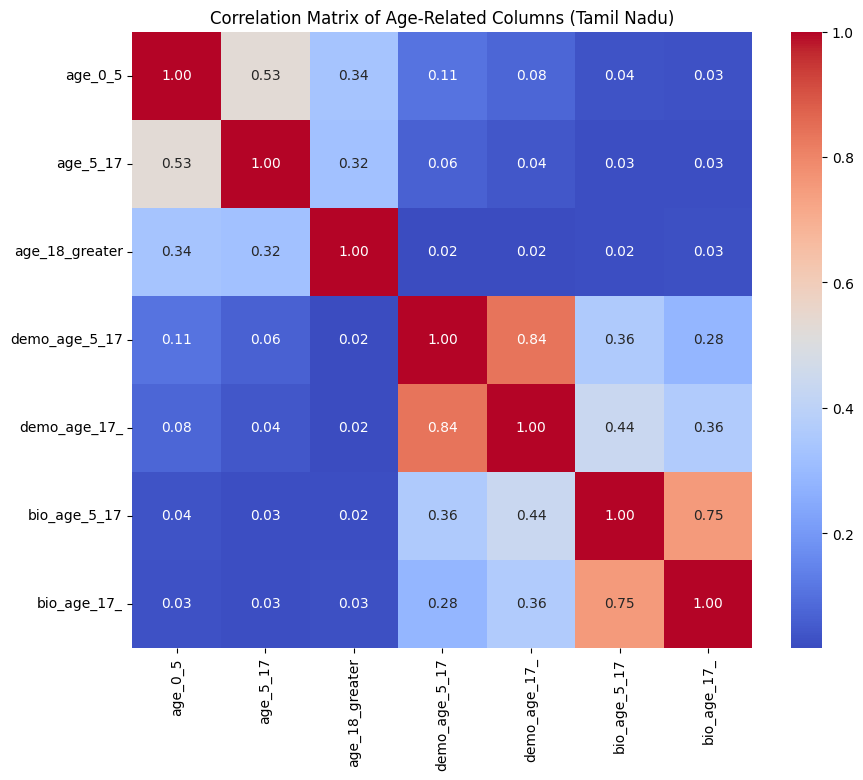

Correlation matrix heatmap for age-related columns displayed for Tamil Nadu.


In [567]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_tn = df_tn_merged[numerical_age_cols].corr()

print("Correlation Matrix for Tamil Nadu:")
print(correlation_matrix_tn)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_tn, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Tamil Nadu)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Tamil Nadu.")

In [568]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_tn_district_mean = df_tn_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Tamil Nadu:")
print(df_tn_district_mean.head())
print(df_tn_district_mean.info())

District-wise average age-related data for Tamil Nadu:
       district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0      Ariyalur  0.488945  0.113727        0.021314       0.860347   
1  Chengalpattu  0.147672  0.056806        0.014496       0.335180   
2       Chennai  0.591583  0.188112        0.016431       0.991965   
3    Coimbatore  0.428738  0.131500        0.011898       0.624178   
4     Cuddalore  0.720454  0.125163        0.006718       0.829507   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      3.637347      5.963417     8.870845  
1      2.980200      0.869888     1.570418  
2      8.190224      6.626095     7.805862  
3      5.305807      3.654256     7.463058  
4      5.441886      6.994586     6.380642  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        49 non-null     object 
 1   age_0_5     

In [578]:
df_tn_district_mean['total_avg_age'] = df_tn_district_mean[age_cols_to_group].sum(axis=1)


print("DataFrame with 'total_avg_age' column:")
print(df_tn_district_mean.head())
df_tn_district_mean_top10 = df_tn_district_mean.nlargest(10, 'total_avg_age')

print("\nTop 10 districts by total average age-related counts in Tamil Nadu:")
print(df_tn_district_mean_top10[['district', 'total_avg_age']])

DataFrame with 'total_avg_age' column:
       district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0      Ariyalur  0.488945  0.113727        0.021314       0.860347   
1  Chengalpattu  0.147672  0.056806        0.014496       0.335180   
2       Chennai  0.591583  0.188112        0.016431       0.991965   
3    Coimbatore  0.428738  0.131500        0.011898       0.624178   
4     Cuddalore  0.720454  0.125163        0.006718       0.829507   

   demo_age_17_  bio_age_5_17  bio_age_17_  total_avg_age  
0      3.637347      5.963417     8.870845      19.955941  
1      2.980200      0.869888     1.570418       5.974661  
2      8.190224      6.626095     7.805862      24.410271  
3      5.305807      3.654256     7.463058      17.619436  
4      5.441886      6.994586     6.380642      20.498956  

Top 10 districts by total average age-related counts in Tamil Nadu:
        district  total_avg_age
16       Madurai      29.981695
15   Krishnagiri      27.391208
41    Tiruvallu

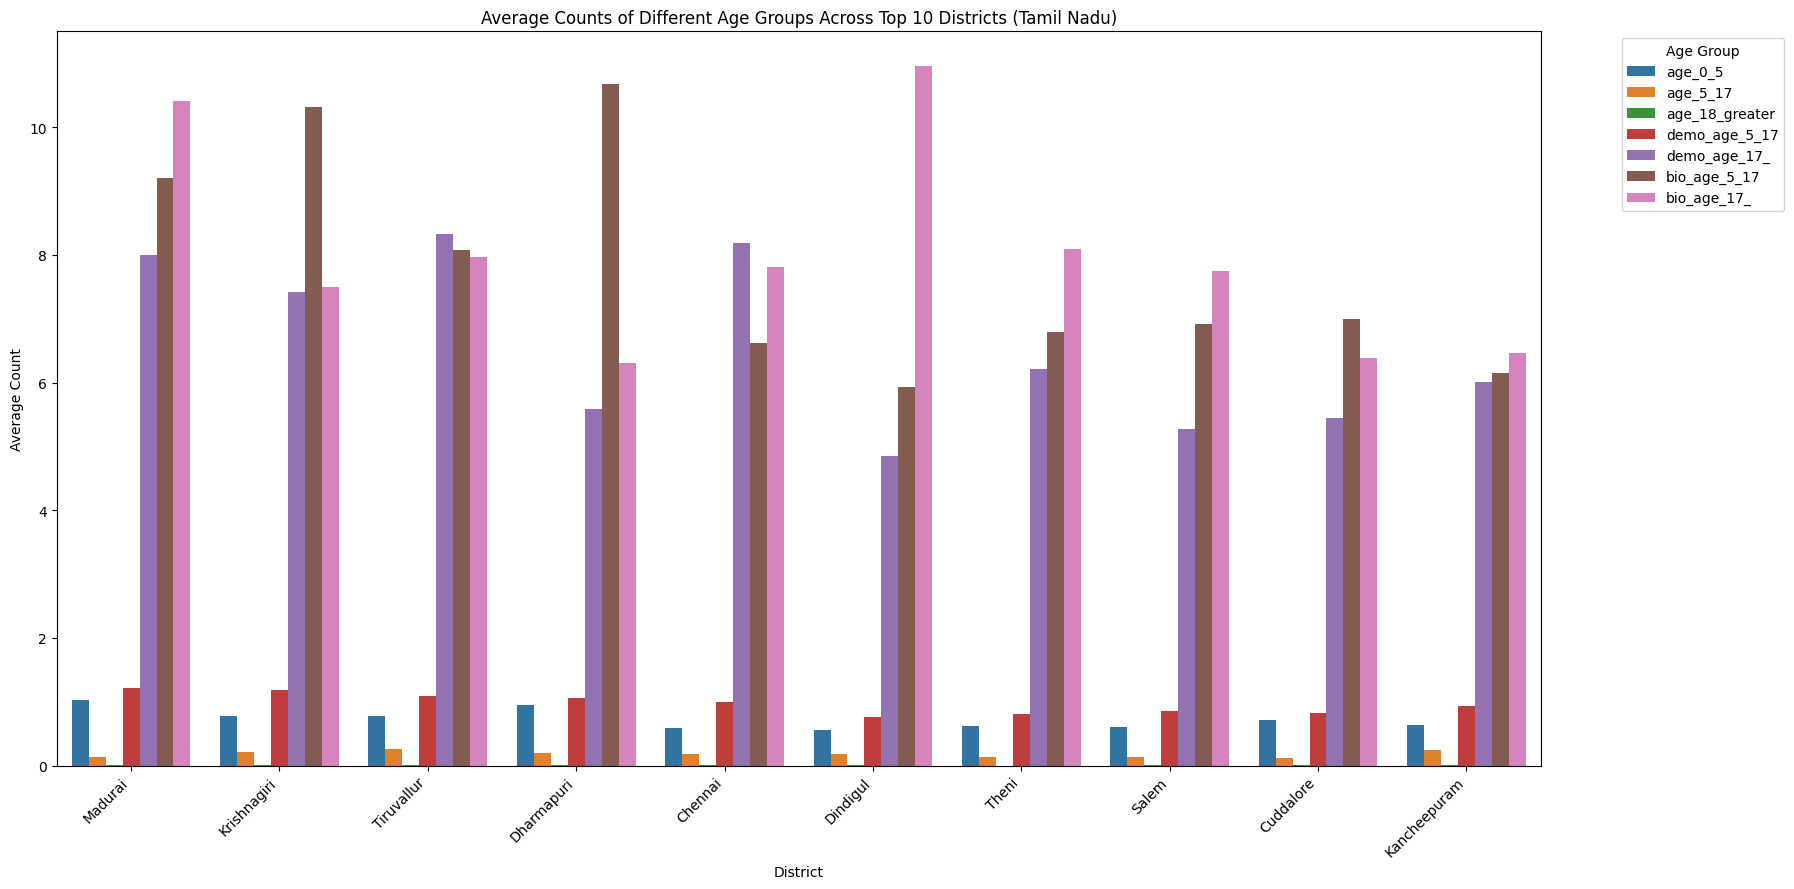

In [571]:
df_tn_district_mean_melted = df_tn_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_tn_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Tamil Nadu)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Time-series aggregated data (sum of age-related columns per date) for Tamil Nadu:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        28173.0      332241.0   
1 2025-03-20     12.0      12.0            10.0            0.0           0.0   
2 2025-04-01    358.0      95.0            46.0         3856.0       35031.0   
3 2025-05-01    322.0      64.0            34.0         3022.0       18087.0   
4 2025-05-20      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0      280532.0     273541.0  
1           0.0          0.0  
2      171234.0     220438.0  
3      179512.0     218759.0  
4        4800.0       6287.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            232 non-null    dateti

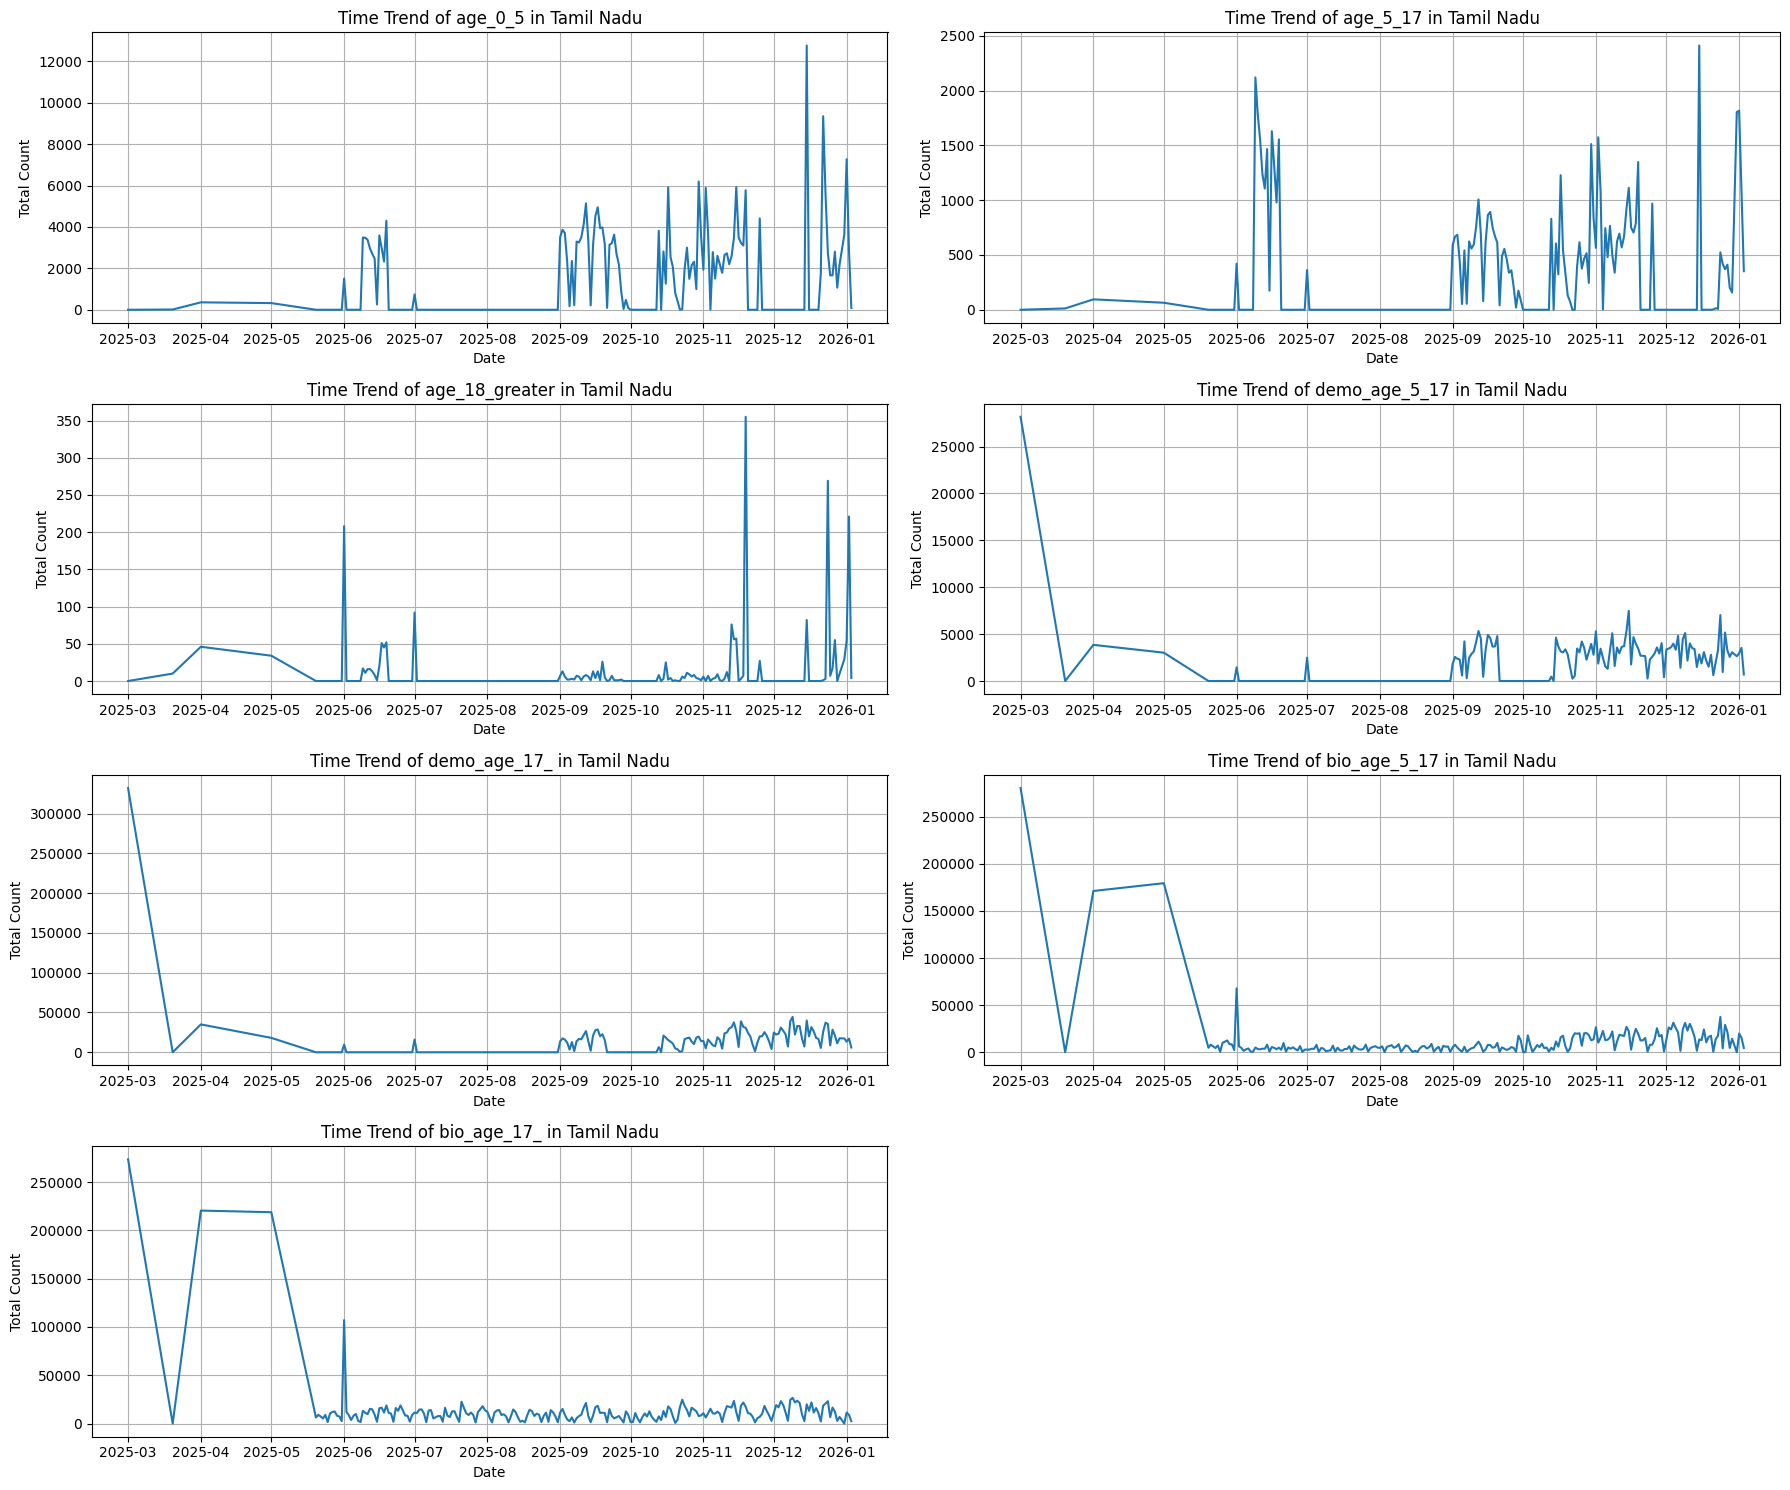

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [572]:
df_tn_time_trend = df_tn_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Tamil Nadu:")
print(df_tn_time_trend.head())
print(df_tn_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_tn_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Tamil Nadu')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

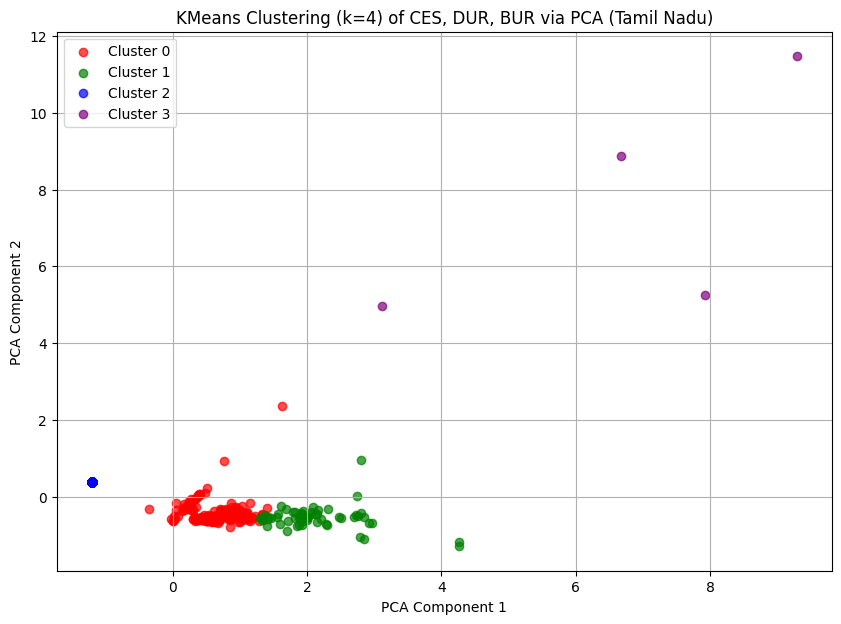

First 5 rows of df_tn_agg with 'clusterlabel' column:
   year  month       state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tamil Nadu      Ariyalur      0.0       0.0             0.0   
1  2025      3  Tamil Nadu  Chengalpattu      0.0       0.0             0.0   
2  2025      3  Tamil Nadu       Chennai      0.0       0.0             0.0   
3  2025      3  Tamil Nadu    Coimbatore      0.0       0.0             0.0   
4  2025      3  Tamil Nadu     Cuddalore      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          509.0        6365.0        5352.0  ...  0.243967  0.123118   
1          136.0        1181.0         273.0  ...  0.009559  0.011194   
2         1974.0       23550.0        8351.0  ...  0.405779  0.290453   
3         1313.0       16609.0        9114.0  ...  0.495997  0.274303   
4          780.0       14390.0        9055.0  ...  0.280589  0.185768   

       ALBI  Enormrisk  CESriskn

In [573]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_tn_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_tn_agg
df_tn_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_tn_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Tamil Nadu)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_tn_agg with 'clusterlabel' column:")
print(df_tn_agg.head())

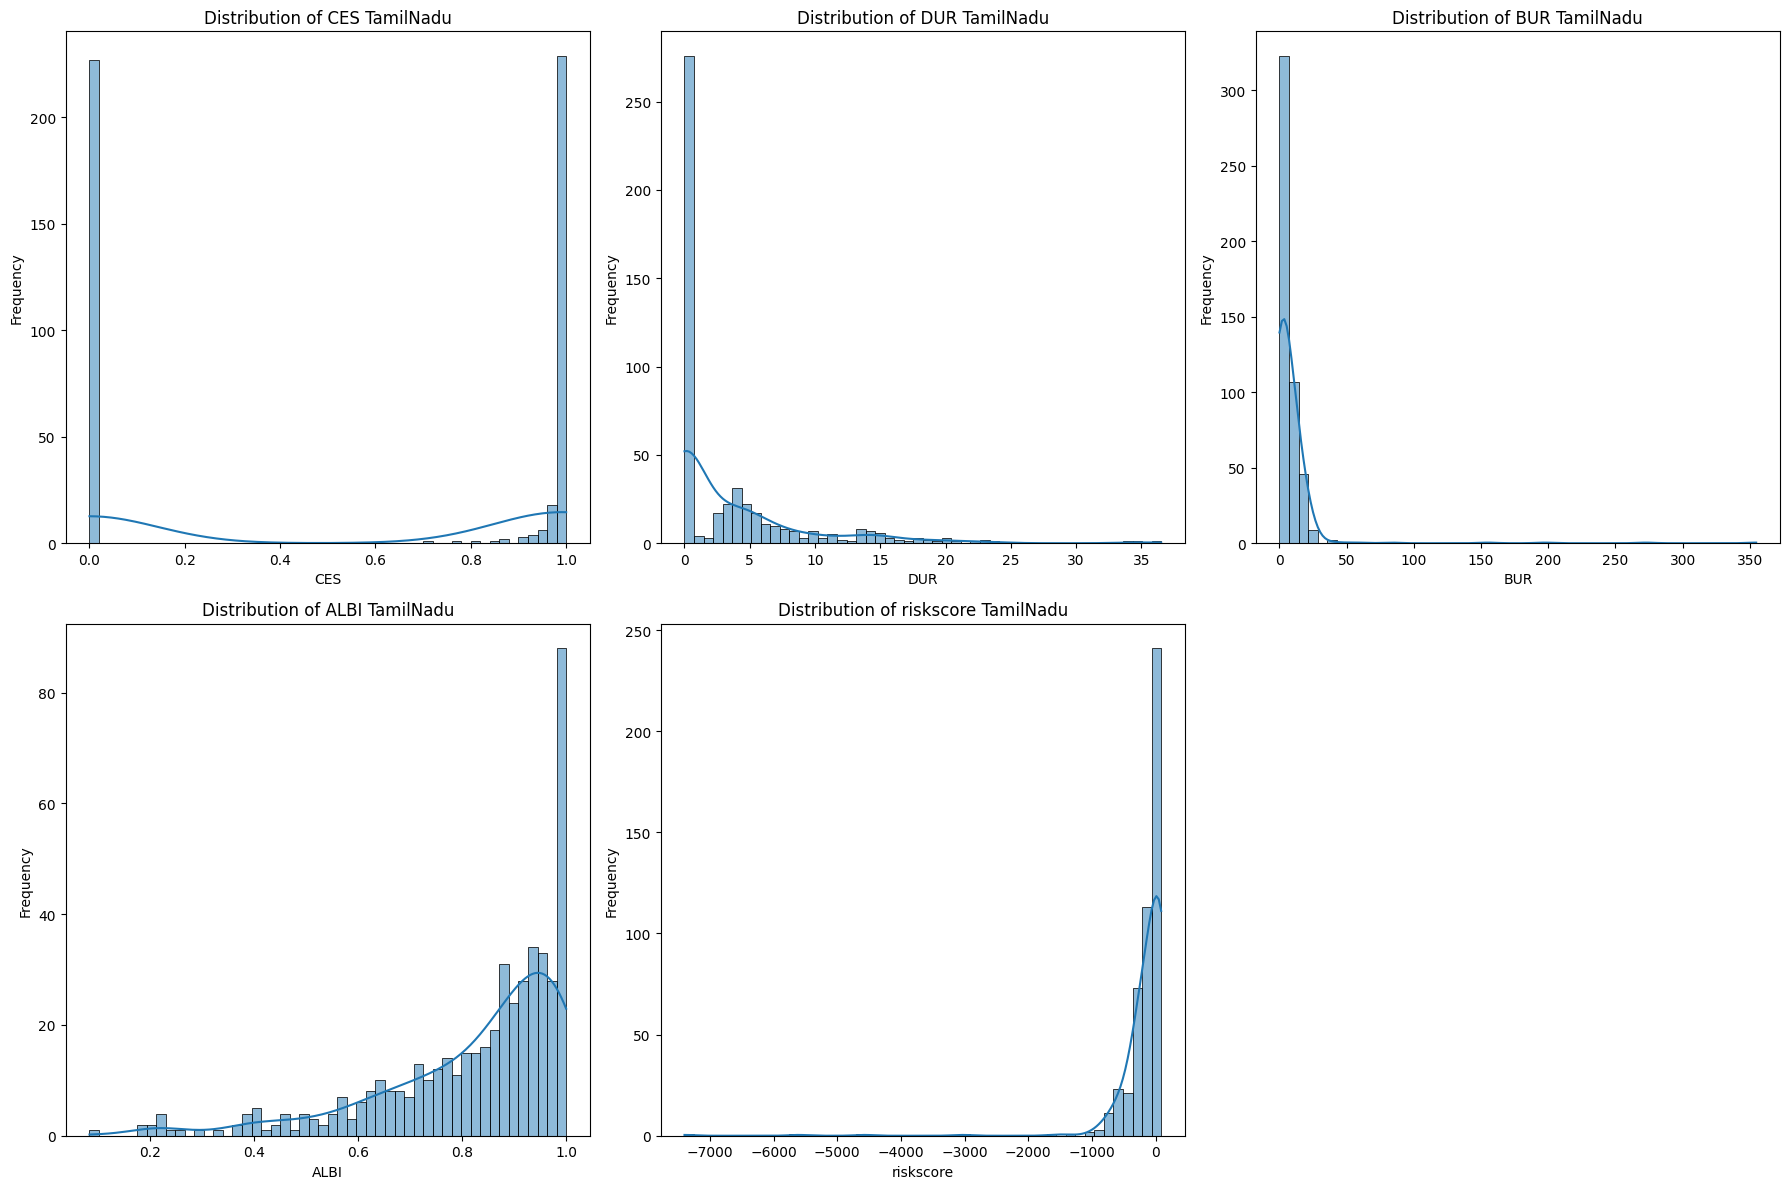

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [579]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_tn_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} TamilNadu')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")

In [575]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_tn_agg['year'].max()
latest_month = df_tn_agg[df_tn_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_tn_agg for the latest year and month
df_latest_month = df_tn_agg[(df_tn_agg['year'] == latest_year) & (df_tn_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
      district  CES
      Ariyalur  1.0
 Kanniyakumari  1.0
  Kallakurichi  1.0
         Erode  1.0
   Pudukkottai  1.0
Ramanathapuram  1.0
      Namakkal  1.0
    Perambalur  1.0
Mayiladuthurai  1.0
       Madurai  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
    district      CES
 Kanchipuram 0.000000
   Tuticorin 0.000000
  Coimbatore 0.766588
   Cuddalore 0.965969
Chengalpattu 0.971154
     Chennai 0.971631
  Tiruvallur 0.979532
Nagapattinam 0.980769
    Dindigul 0.981132
The Nilgiris 0.983871

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
     district      DUR
 Chengalpattu 7.375000
 Kallakurichi 5.244898
Kanniyakumari 4.945578
      Chennai 4.788652
  Kanyakumari 4.400000
     Tiruppur 4.359331
      Ranipet 4.250000
        Erode 3.988732
        Theni 3.975124
     Namakkal 3.945378

Bottom 10 Districts by DUR (Year 2026, Month 1):
     

## Summary (Tamil Nadu):

The Aadhaar lifecycle analysis for Tamil Nadu provides a detailed view of enrolment and update activities across its districts. The `df_tn_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_tn_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Several districts (Ariyalur, Kanniyakumari, Kallakurichi, Erode, Pudukkottai, Ramanathapuram, Namakkal, Perambalur, Mayiladuthurai, Madurai) achieved a perfect CES of 1.0, indicating all enrolments were child enrolments in the latest period. Kanchipuram and Tuticorin had 0.0 CES, indicating no child enrolments were reported for these districts in the latest month. Coimbatore (0.767) had the next lowest CES.
    *   **DUR (Demographic Update Rate)**: Chengalpattu (7.375) and Kallakurichi (5.245) showed the highest DUR, suggesting strong demographic update activity relative to enrolments. Kanchipuram, Tirupathur, and Tuticorin had 0.0 DURs, indicating no demographic updates were reported for these districts in the latest month.
    *   **BUR (Biometric Update Rate)**: Sivaganga (7.110) and Villupuram (6.761) showed the highest BURs. Kanchipuram and Tuticorin had 0.0 BURs, indicating no biometric updates for these districts in the latest month. Chengalpattu (1.962) and Tenkasi (1.988) were among the lowest among districts with non-zero BUR.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Tuticorin (1.0), Kanchipuram (0.999), and Tirupathur (0.999) exhibited the best balance, close to 1. Tiruvallur (0.084) and Kancheepuram (0.187) had the lowest balance.
    *   **Risk Score**: Kanchipuram (80.003) and Tuticorin (80.000) showed the highest risk scores. Similar to other states, negative risk scores were observed for a majority of districts in Tamil Nadu (ranging from -0.009 for Tirupathur to -158.519 for Tiruppur). This consistent issue across multiple states suggests a critical need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

### Conclusion:

Tamil Nadu displays diverse performance across its districts in Aadhaar lifecycle management. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The persistent issue with negative `riskscore` values across multiple states, including Tamil Nadu, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.